In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import CollisionModule

In [2]:
import torch

In [3]:
release_pos = np.load('./release_pos_1e8.npy')
velosity_matrix = np.load('./velosity_matrix_1e8.npy')
DXsec_Al = np.load('./DXsec_Al_1e8.npy')

(6565275, 3)


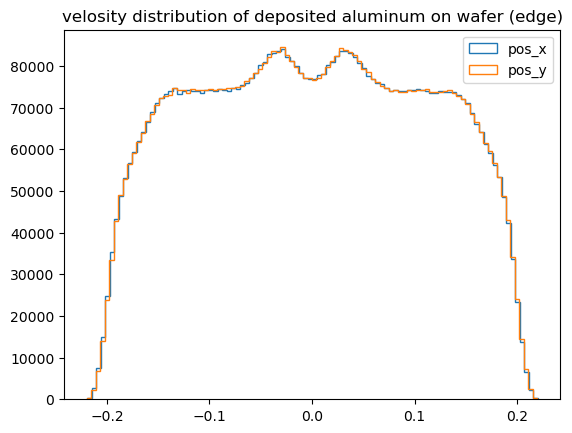

In [4]:
print(release_pos.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(release_pos[:,0], bins=100,histtype='step', stacked=True, fill=False, label='pos_x')
ax.hist(release_pos[:,1], bins=100,histtype='step', stacked=True, fill=False, label='pos_y')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(6565275, 3)


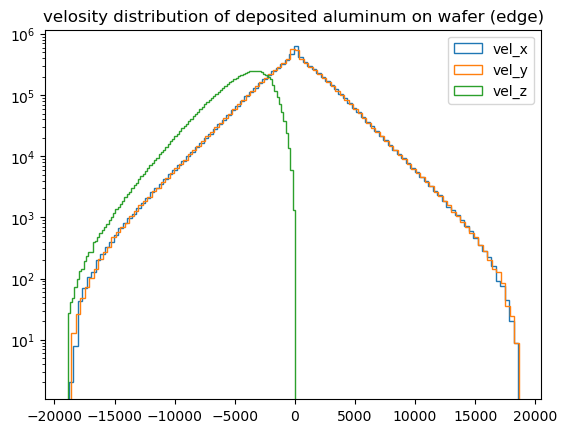

In [5]:
print(velosity_matrix.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [6]:
TS = 0.06 #300mm
release_pos[:,0] += 0.24
release_pos[:,1] += 0.24
release_pos[:,2] += TS
print(release_pos[:,0].min())
print(release_pos[:,0].max())
print(release_pos[:,1].min())
print(release_pos[:,1].max())

0.020771630986947898
0.459774927605747
0.020272437316419506
0.4594524202704513


In [7]:
transport = CollisionModule.transport(pressure_pa=0.1, timeStep= 1e-7, temperature=300, cellSize=[240, 240, 50], celllength=0.48/240, chamberSize=[0.24, 0.24], DXsec=DXsec_Al)
transport.setXsec(energy_range=[0, 50, 50])

l:\ysy\etching\CollisionModule.py:98: RuntimeWarning: divide by zero encountered in divide
  diVr = d_refi * np.sqrt(((kb*Tref)/(eVr*self.q))**(wi-1/2)*gamma(5/2 - wi))


array([0.00000000e+00, 2.48469445e-19, 2.13253357e-19, 1.95014882e-19,
       1.83028518e-19, 1.74240899e-19, 1.67375019e-19, 1.61781505e-19,
       1.57087507e-19, 1.53060285e-19, 1.49545376e-19, 1.46435341e-19,
       1.43652611e-19, 1.41139470e-19, 1.38851878e-19, 1.36755521e-19,
       1.34823170e-19, 1.33032883e-19, 1.31366734e-19, 1.29809902e-19,
       1.28350001e-19, 1.26976583e-19, 1.25680757e-19, 1.24454901e-19,
       1.23292430e-19, 1.22187624e-19, 1.21135481e-19, 1.20131605e-19,
       1.19172114e-19, 1.18253562e-19, 1.17372878e-19, 1.16527314e-19,
       1.15714403e-19, 1.14931921e-19, 1.14177857e-19, 1.13450388e-19,
       1.12747855e-19, 1.12068745e-19, 1.11411676e-19, 1.10775379e-19,
       1.10158690e-19, 1.09560536e-19, 1.08979929e-19, 1.08415954e-19,
       1.07867764e-19, 1.07334573e-19, 1.06815650e-19, 1.06310317e-19,
       1.05817939e-19, 1.05337924e-19])

In [8]:
result = transport.runE(p0=release_pos, v0=velosity_matrix, time=1e-3)

running: 100%|██████████████████████████████████████████████████████| 100/100 [13:19<00:00, 8.00s/B]


In [12]:
np.save('transport_result_posvel', result[2])

In [13]:
np.save('transport_result_collisionPos', result[1])

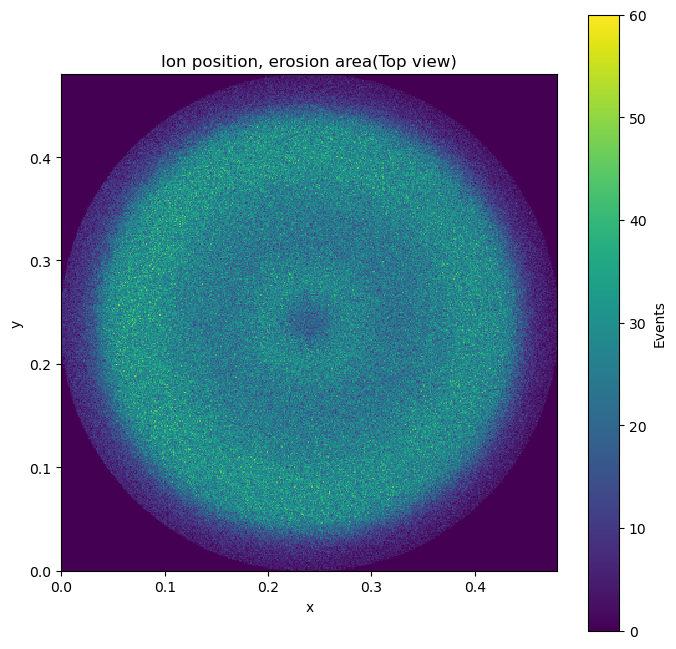

In [10]:
x_erosion_np = result[1][:,0]
y_erosion_np = result[1][:,1]

xbins = np.linspace(0,0.48,400)
ybins = np.linspace(0,0.48,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

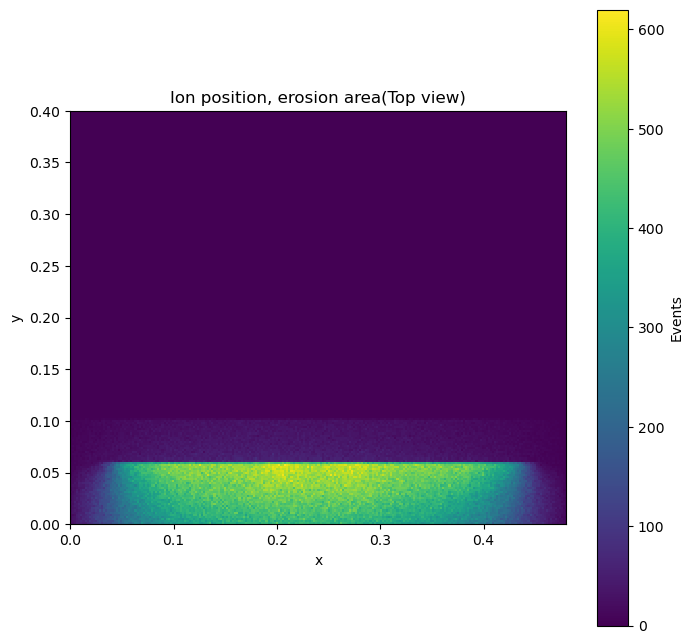

In [11]:
x_erosion_np = result[1][:,0]
z_erosion_np = result[1][:,2]

xbins = np.linspace(0,0.48,240)
zbins = np.linspace(0,0.4,200)
# zbins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
z_bins = np.histogram(z_erosion_np, bins=zbins)

H, xedges, zedges = np.histogram2d(x_erosion_np, z_erosion_np, bins=(xbins, zbins))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [14]:
depo_pv = result[2]
a = np.array(depo_pv)
print(a.shape)

(5740567, 6)


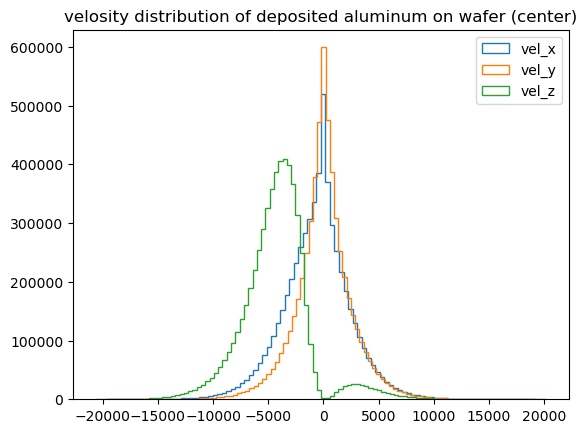

In [15]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(a[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(a[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(a[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

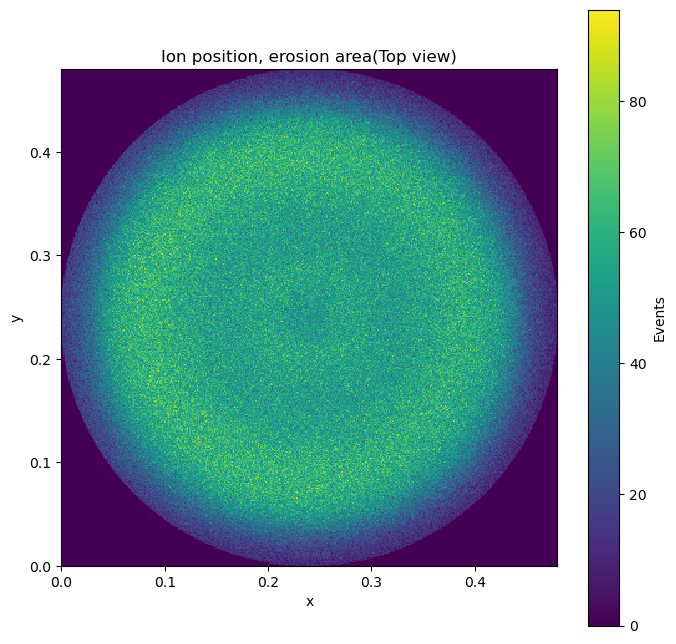

In [16]:
x_erosion_np = a[:,0]
y_erosion_np = a[:,1]

xbins = np.linspace(0,0.48,400)
ybins = np.linspace(0,0.48,400)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [17]:
center_indices = np.logical_and(a[:,0] > 0.2, a[:,0] < 0.28)
center_indices |= np.logical_and(a[:,1] > 0.2, a[:,1] < 0.28)
center_indices |= np.logical_and(a[:,2] > 0.2, a[:,2] > 0)

if np.any(center_indices):
    center_depo = a[~center_indices]

print(center_depo.shape)

(3348645, 6)


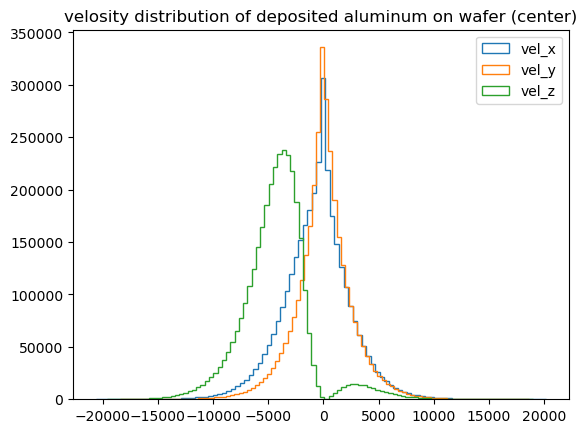

In [18]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [19]:
center_indices = np.logical_and(a[:,0] > 0.22, a[:,0] < 0.26)
center_indices |= np.logical_and(a[:,1] > 0.22, a[:,1] < 0.26)

if np.any(center_indices):
    center_depo = a[center_indices]

print(center_depo.shape)

(1258107, 6)


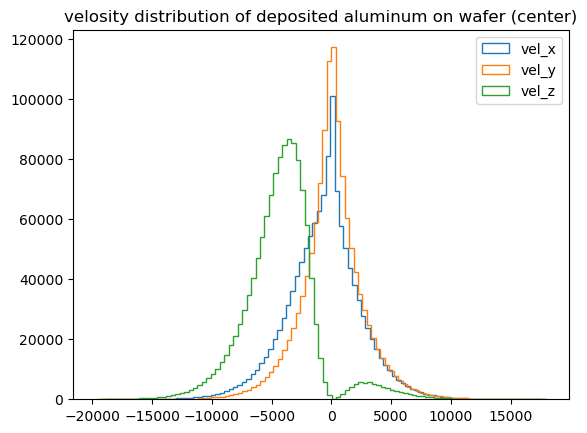

In [20]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [21]:
center_indices = np.logical_or(a[:,0] < 0.2, a[:,0] > 0.28)
center_indices |= np.logical_or(a[:,1] < 0.2, a[:,1] > 0.28)
center_indices |= np.array(a[:,2] > 0.01)

if np.any(center_indices):
    center_depo = a[~center_indices]

print(center_depo.shape)

(225131, 6)


In [22]:
for i in range(1):
    center_depo = np.concatenate((center_depo, center_depo), axis=0)

print(center_depo.shape)

(450262, 6)


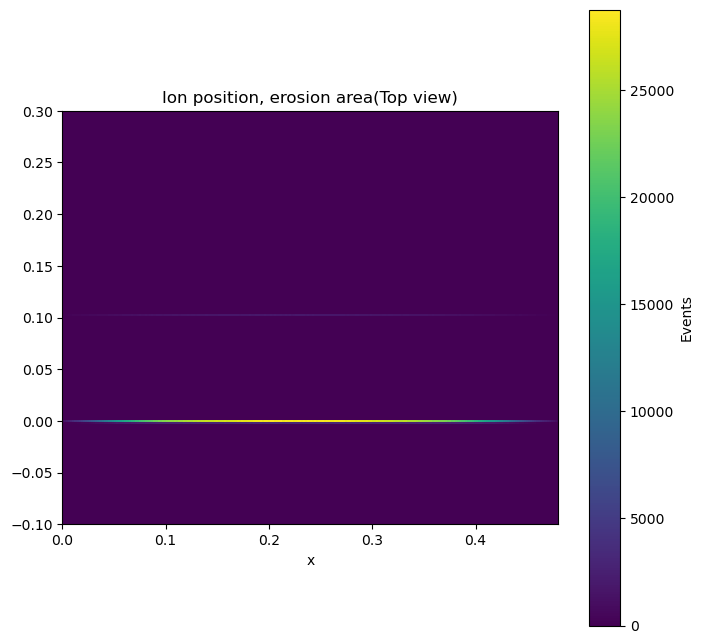

In [23]:
x_erosion_np = a[:,0]
z_erosion_np = a[:,2]

xbins = np.linspace(0,0.48,240)
zbins = np.linspace(-0.1,0.3,200)
# zbins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
z_bins = np.histogram(z_erosion_np, bins=zbins)

H, xedges, zedges = np.histogram2d(x_erosion_np, z_erosion_np, bins=(xbins, zbins))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

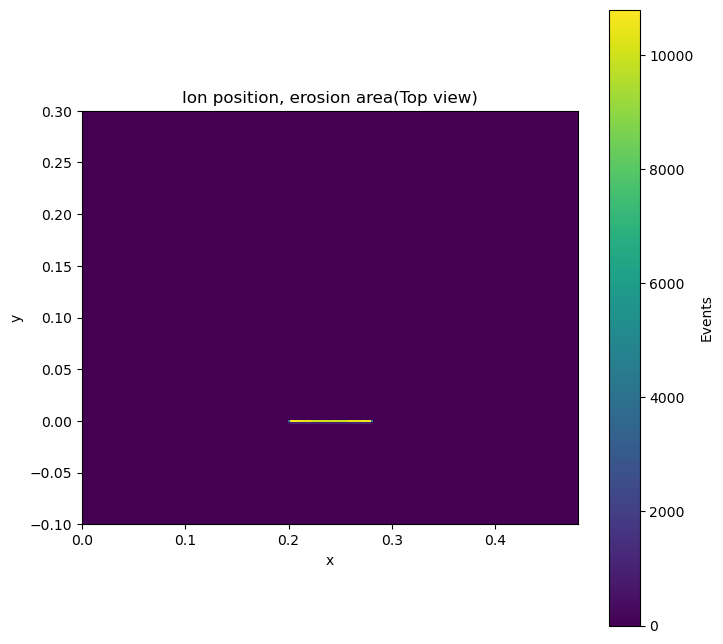

In [24]:
x_erosion_np = center_depo[:,0]
z_erosion_np = center_depo[:,2]

xbins = np.linspace(0,0.48,240)
zbins = np.linspace(-0.1,0.3,200)
# zbins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
z_bins = np.histogram(z_erosion_np, bins=zbins)

H, xedges, zedges = np.histogram2d(x_erosion_np, z_erosion_np, bins=(xbins, zbins))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

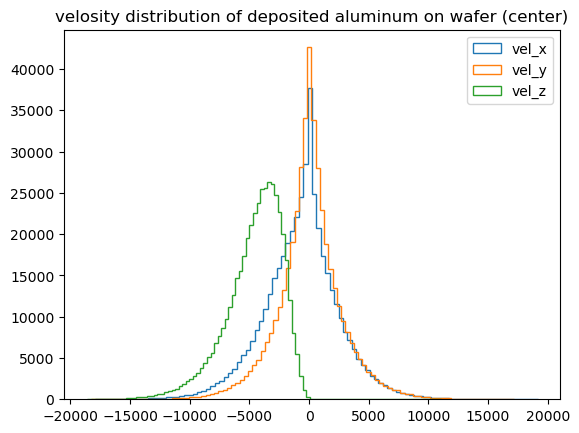

In [25]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [26]:
import depoSimulator_symmetry

In [27]:
film = np.zeros((88, 88, 120))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 30
left_side = 24
right_side = 24
film[:, 88-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[88-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

In [25]:
substrute = torch.Tensor(film==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter()
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=5)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:64215/index.html?ui=P_0x26d011f4dd0_0&reconnect=auto" class="pyvis…

In [28]:
print(center_depo[:, 3:].shape)

(450262, 3)


In [29]:
test = depoSimulator_symmetry.depo(param = [1.6, -0.7], TS = 0.3, N = center_depo.shape[0], sub_xy=[0,0], film=film, n=1, cellSize=[88, 88, 120], celllength=1, kdtreeN=5, tstep=1e-4)
deposit = test.run_afterCollision(1, 125, center_depo[:, 3:])

running:   0%|                                                            | 0.00/100 [00:00<?, ?B/s]

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
2
4
9
17
15
24
26
40
41
41
50
70
88
93
117
130
164
165
184
236
232
25
30
30
19
21
24
24
24
27
26
23
27
29
23
32
28
32
29
23
21
23
30
29
28
33
27
37
17
33
38
33
34
31
29
28
24
30
37
40
29
45
39
38
25
40
40
37
40
46
41
29
38
31
43
42
39
37
31
37
32
37
35
44
49
46
40
42
48
50
41
43
43
45
36
31
44
46
54
36
56
33
54
54
40
49
55
56
50
46
45
52
37
46
43
54
51
62
53
50
60
50
57
62
52
54
47
60
59
53
57
57
61
54
64
70
52
57
63
61
52
74
56
71
71
61
54
45
44
65
64
58
68
50
64
74
52
67
61
72
62
62
69
59
67
65
68
67
60
79
71
68
75
71
83
74
76
84
68
75
67
76
71
81
87
63
74
76
77
81
89
85
100
89
93
75
91
78
76
96
73
85
91
70
95
76
83
88
83
83
81
93
91
85
92
76
76
90
90
86
112
94
91
88
86
98
84
87
96
89
93
79
88
104
92
98
73
97
99
105
92
100
92
93
114
108
92
95
93
96
93
115
86
105
98
82
105
107
89
104
90
98
95
118
105
91
115
97
116
115
119
119
110
109
128
121
108
117
126
115
141
129
125
116
105
136
104
111
109
113

running:   1%|▌                                                  | 1.00/100 [07:59<13:10:30, 479s/B]

429
416
413
430
422
460
444
397
401
395
374
388
429
456
450
430
419
399
401
433
415
368
391
436
458
449
447
442
412
405
381
408
448
426
429
402
439
424
453
436
342
359
387
419
447
395
415
394
415
396
407
412
447
422
432
415
394
432
391
406
436
435
422
421
402
382
407
381
397
389
405
414
384
385
403
417
409
411
403
350
348
365
387
370
333
389
371
382
379
377
360
357
371
327
350
345
330
333
338
358
395
355
364
367
375
329
351
364
342
339
365
366
352
363
339
314
338
362
337
339
363
341
341
331
355
338
326
348
327
365
343
370
326
313
306
321
307
303
318
325
316
321
307
274
313
327
310
321
328
318
307
329
305
317
322
323
311
313
313
299
294
305
321
302
323
293
327
325
311
268
274
295
299
301
286
287
305
296
289
285
281
298
310
278
255
244
270
312
267
260
278
272
277
286
290
259
291
269
266
263
276
245
232
263
232
232
258
271
251
269
304
316
248
241
262
277
262
255
250
230
237
272
294
283
266
247
247
245
240
241
248
227
255
251
242
204
237
203
221
214
213
204
230
210
213
262
223
222
240
213


running:   2%|█                                                   | 2.00/100 [12:30<9:42:35, 357s/B]

31
37
41
26
38
38
40
39
30
26
31
27
27
27
29
38
42
35
32
37
35
36
44
31
35
20
36
39
38
34
28
33
26
33
28
37
30
37
25
34
40
33
25
25
32
33
25
33
21
32
26
33
31
22
32
32
25
27
28
20
35
30
28
28
24
19
26
24
34
29
25
28
32
23
30
21
38
43
27
31
25
30
37
29
34
20
26
24
30
34
35
36
28
33
31
22
26
22
25
34
18
29
36
27
38
27
30
22
27
33
32
26
30
27
22
25
33
29
27
31
27
28
21
23
29
28
19
25
27
18
17
21
29
27
18
20
26
20
30
18
21
25
32
23
31
36
20
25
27
21
24
30
28
27
31
19
21
30
29
19
17
27
30
26
30
31
25
25
25
27
27
35
22
25
24
16
35
26
31
25
24
20
18
23
26
16
17
34
21
32
24
29
27
23
19
26
23
22
24
24
24
16
30
20
24
29
19
30
11
23
17
18
16
25
26
21
23
23
19
25
20
21
21
23
31
25
15
18
28
24
20
21
30
18
28
19
16
15
18
13
13
26
25
25
21
19
13
17
21
16
26
25
27
20
20
12
22
18
17
14
27
23
19
26
20
22
18
34
29
20
17
22
18
22
12
19
26
24
23
21
9
16


running:   3%|█▌                                                  | 3.00/100 [13:32<5:59:06, 222s/B]

1412
1422
1247
1133
966
817
765
707
660


running:   4%|██                                                  | 4.00/100 [13:34<3:36:32, 135s/B]

574
506
429
422
342
307
313
267
259
232


running:   5%|██▌                                                | 5.00/100 [13:36<2:18:18, 87.4s/B]

204
185
163
163
143
125
117
133
120
92
96


running:   6%|███                                                | 6.00/100 [13:38<1:31:22, 58.3s/B]

96
71
63
90
53
66
64
56
55
48


running:   7%|███▌                                               | 7.00/100 [13:40<1:01:57, 40.0s/B]

47
43
27
39
28
33
37
28
32
30


running:   8%|████▏                                                | 8.00/100 [13:42<42:45, 27.9s/B]

29
32
23
21
24
23
27
12
11


running:   9%|████▊                                                | 9.00/100 [13:44<30:03, 19.8s/B]

18
23
18
21
12
12
12
18
13
12
19


running:  10%|█████▎                                               | 10.0/100 [13:46<21:30, 14.3s/B]

8
8
10
11
12
15
3
11
8
7


running:  11%|█████▊                                               | 11.0/100 [13:49<15:45, 10.6s/B]

5
5
8
3
5
8
7
3
8
7


running:  12%|██████▎                                              | 12.0/100 [13:51<11:44, 8.00s/B]

7
11
4
5
6
4
1
7
4
5


running:  13%|██████▉                                              | 13.0/100 [13:53<09:01, 6.23s/B]

6
7
3
4
6
7
5
5
8
4


running:  14%|███████▍                                             | 14.0/100 [13:55<07:10, 5.00s/B]

3
4
6
6
0
1
3
3
3
2


running:  15%|███████▉                                             | 15.0/100 [13:57<05:48, 4.11s/B]

1
1
2
1
2
4
3
2
1
1


running:  16%|████████▍                                            | 16.0/100 [13:59<04:54, 3.50s/B]

1
5
2
2
1
1
1
2
0


running:  17%|█████████                                            | 17.0/100 [14:01<04:15, 3.08s/B]

0
1
0
1
1
1
0
3
0
0
1


running:  18%|█████████▌                                           | 18.0/100 [14:03<03:48, 2.79s/B]

1
0
0
1
2
1
1
3
2
1


running:  19%|██████████                                           | 19.0/100 [14:06<03:31, 2.61s/B]

0
1
0
1
0
2
2
0
2


running:  20%|██████████▌                                          | 20.0/100 [14:08<03:13, 2.42s/B]

1
2
0
1
1
1
1
2
1
0
0


running:  21%|███████████▏                                         | 21.0/100 [14:10<03:04, 2.33s/B]

2
1
0
1
2
0
1
0
1
1


running:  22%|███████████▋                                         | 22.0/100 [14:12<02:54, 2.23s/B]

0
0
0
0
3
0
1
0
0
0


running:  23%|████████████▏                                        | 23.0/100 [14:14<02:51, 2.23s/B]

0
1
0
1
0
0
0
1
1
1


running:  24%|████████████▋                                        | 24.0/100 [14:16<02:44, 2.17s/B]

0
1
0
0
1
0
1
0
0
2


running:  25%|█████████████▎                                       | 25.0/100 [14:18<02:41, 2.16s/B]

1
1
3
0
2
0
0
0
1
0


running:  26%|█████████████▊                                       | 26.0/100 [14:20<02:36, 2.12s/B]

0
1
0
0
0
0
2
0
2
0


running:  27%|██████████████▎                                      | 27.0/100 [14:22<02:34, 2.12s/B]

0
0
0
0
0
0
0
0
0
0


running:  28%|██████████████▊                                      | 28.0/100 [14:24<02:27, 2.05s/B]

0
1
1
1
0
0
0
0
0


running:  29%|███████████████▎                                     | 29.0/100 [14:26<02:29, 2.11s/B]

0
1
0
0
0
1
0
0
0
0
0


running:  30%|███████████████▉                                     | 30.0/100 [14:28<02:28, 2.12s/B]

0
0
0
0
0
0
0
1
0
1


running:  31%|████████████████▍                                    | 31.0/100 [14:31<02:25, 2.11s/B]

0
0
0
1
0
0
0
0
0
1


running:  32%|████████████████▉                                    | 32.0/100 [14:33<02:21, 2.08s/B]

0
0
0
0
0
1
2
0
0
0


running:  33%|█████████████████▍                                   | 33.0/100 [14:35<02:23, 2.14s/B]

0
0
1
1
0
0
1
0
0
0


running:  34%|██████████████████                                   | 34.0/100 [14:37<02:17, 2.08s/B]

0
0
0
1
0
1
0
0
0
0


running:  35%|██████████████████▌                                  | 35.0/100 [14:39<02:18, 2.12s/B]

1
0
0
0
0
0
1
0
1


running:  36%|███████████████████                                  | 36.0/100 [14:41<02:15, 2.11s/B]

0
0
0
0
1
1
0
0
0
0
0


running:  37%|███████████████████▌                                 | 37.0/100 [14:43<02:15, 2.14s/B]

0
0
0
0
0
0
0
0
0
0


running:  38%|████████████████████▏                                | 38.0/100 [14:45<02:11, 2.12s/B]

0
0
0
0
0
0
0
0
0
0


running:  39%|████████████████████▋                                | 39.0/100 [14:47<02:08, 2.11s/B]

1
0
0
0
0
1
1
0
0
0


running:  40%|█████████████████████▏                               | 40.0/100 [14:49<02:03, 2.07s/B]

0
0
0
0
0
0
0
0
0
0


running:  41%|█████████████████████▋                               | 41.0/100 [14:52<02:02, 2.08s/B]

0
0
0
0
0
0
0
1
0
0


running:  42%|██████████████████████▎                              | 42.0/100 [14:54<02:02, 2.11s/B]

0
0
1
0
0
0
0
0
0
0


running:  43%|██████████████████████▊                              | 43.0/100 [14:56<02:02, 2.15s/B]

0
0
0
0
0
0
0
0
0
0


running:  44%|███████████████████████▎                             | 44.0/100 [14:58<01:59, 2.13s/B]

0
0
0
0
0
1
0
0
0


running:  45%|███████████████████████▊                             | 45.0/100 [15:00<01:57, 2.13s/B]

0
0
0
1
0
0
0
0
0
0
0


running:  46%|████████████████████████▍                            | 46.0/100 [15:02<01:56, 2.16s/B]

0
0
0
0
0
0
0
1
0
0


running:  47%|████████████████████████▉                            | 47.0/100 [15:04<01:52, 2.12s/B]

0
0
0
0
0
0
0
0
0
0


running:  48%|█████████████████████████▍                           | 48.0/100 [15:07<01:52, 2.17s/B]

0
0
0
0
0
0
0
0
0
0


running:  49%|█████████████████████████▉                           | 49.0/100 [15:09<01:51, 2.19s/B]

0
0
0
0
0
0
0
0
0
0


running:  50%|██████████████████████████▌                          | 50.0/100 [15:11<01:47, 2.15s/B]

0
0
0
0
0
0
0
0
0
0


running:  51%|███████████████████████████                          | 51.0/100 [15:13<01:44, 2.13s/B]

0
0
0
0
1
0
0
0
0
0


running:  52%|███████████████████████████▌                         | 52.0/100 [15:15<01:42, 2.14s/B]

0
0
0
0
0
0
0
0
0
0


running:  53%|████████████████████████████                         | 53.0/100 [15:17<01:40, 2.15s/B]

0
0
0
0
0
0
0
0
0
0


running:  54%|████████████████████████████▌                        | 54.0/100 [15:20<01:39, 2.16s/B]

0
0
0
0
0
0
0
1
0


running:  55%|█████████████████████████████▏                       | 55.0/100 [15:22<01:37, 2.17s/B]

0
0
0
0
0
0
0
0
0
0
0


running:  56%|█████████████████████████████▋                       | 56.0/100 [15:24<01:34, 2.14s/B]

0
0
0
0
0
1
0
0
0
0


running:  57%|██████████████████████████████▏                      | 57.0/100 [15:26<01:31, 2.12s/B]

1
0
0
0
0
0
0
0
0
0


running:  58%|██████████████████████████████▋                      | 58.0/100 [15:28<01:29, 2.14s/B]

0
0
0
0
0
0
0
0
0
0


running:  59%|███████████████████████████████▎                     | 59.0/100 [15:30<01:26, 2.12s/B]

0
0
0
0
0
0
0
0
0
0


running:  60%|███████████████████████████████▊                     | 60.0/100 [15:32<01:25, 2.14s/B]

0
0
0
0
0
0
0
0
0
0


running:  61%|████████████████████████████████▎                    | 61.0/100 [15:35<01:23, 2.14s/B]

0
0
0
0
0
0
0
0
0


running:  62%|████████████████████████████████▊                    | 62.0/100 [15:37<01:22, 2.17s/B]

0
0
0
0
0
0
0
0
0
0
0


running:  63%|█████████████████████████████████▍                   | 63.0/100 [15:39<01:20, 2.18s/B]

0
0
0
0
0
0
0
0
0
0


running:  64%|█████████████████████████████████▉                   | 64.0/100 [15:41<01:17, 2.16s/B]

0
0
0
1
0
0
0
0
0
0


running:  65%|██████████████████████████████████▍                  | 65.0/100 [15:43<01:15, 2.17s/B]

0
0
0
0
0
0
0
0
0
0


running:  66%|██████████████████████████████████▉                  | 66.0/100 [15:45<01:14, 2.18s/B]

0
0
0
0
0
0
0
0
0
0


running:  67%|███████████████████████████████████▌                 | 67.0/100 [15:48<01:13, 2.23s/B]

0
0
0
0
0
0
0
0
0
0


running:  68%|████████████████████████████████████                 | 68.0/100 [15:50<01:10, 2.21s/B]

0
0
0
0
0
0
0
0
0
0


running:  69%|████████████████████████████████████▌                | 69.0/100 [15:52<01:08, 2.20s/B]

0
0
0
0
0
0
0
0
0
0


running:  70%|█████████████████████████████████████                | 70.0/100 [15:54<01:05, 2.17s/B]

0
0
0
0
0
0
0
0
0
0


running:  71%|█████████████████████████████████████▋               | 71.0/100 [15:56<01:02, 2.16s/B]

0
0
0
0
0
0
0
0
0
0


running:  72%|██████████████████████████████████████▏              | 72.0/100 [15:59<01:00, 2.16s/B]

0
0
0
0
0
0
0
0
0
0


running:  73%|██████████████████████████████████████▋              | 73.0/100 [16:01<00:58, 2.16s/B]

0
0
0
0
0
1
0
0
0
0


running:  74%|███████████████████████████████████████▏             | 74.0/100 [16:03<00:56, 2.16s/B]

0
0
0
0
0
0
0
0
0
0


running:  75%|███████████████████████████████████████▊             | 75.0/100 [16:05<00:53, 2.14s/B]

1
0
0
0
0
0
0
0
0
0


running:  76%|████████████████████████████████████████▎            | 76.0/100 [16:07<00:51, 2.15s/B]

0
0
0
0
0
0
0
0
0
0


running:  77%|████████████████████████████████████████▊            | 77.0/100 [16:09<00:50, 2.19s/B]

0
0
0
0
0
0
0
0
0
0


running:  78%|█████████████████████████████████████████▎           | 78.0/100 [16:12<00:49, 2.25s/B]

0
0
0
0
0
0
0
0
0
0


running:  79%|█████████████████████████████████████████▊           | 79.0/100 [16:14<00:46, 2.21s/B]

0
0
0
0
0
0
0
0
0
0


running:  80%|██████████████████████████████████████████▍          | 80.0/100 [16:16<00:43, 2.19s/B]

0
0
0
0
0
1
0
0
0
1


running:  81%|██████████████████████████████████████████▉          | 81.0/100 [16:18<00:42, 2.23s/B]

0
0
0
0
0
0
0
0
0
0


running:  82%|███████████████████████████████████████████▍         | 82.0/100 [16:20<00:39, 2.18s/B]

0
0
0
0
0
0
0
0
0
0


running:  83%|███████████████████████████████████████████▉         | 83.0/100 [16:22<00:36, 2.12s/B]

0
0
0
0
0
0
0
0
0
0


running:  84%|████████████████████████████████████████████▌        | 84.0/100 [16:25<00:33, 2.11s/B]

0
0
0
0
0
0
0
0
0
0


running:  85%|█████████████████████████████████████████████        | 85.0/100 [16:27<00:31, 2.10s/B]

0
0
0
0
0
0
0
0
0


running:  86%|█████████████████████████████████████████████▌       | 86.0/100 [16:29<00:28, 2.05s/B]

0
0
0
0
0
0
0
0
0
0
0


running:  87%|██████████████████████████████████████████████       | 87.0/100 [16:31<00:27, 2.09s/B]

0
0
0
0
0
0
0
0
0
0


running:  88%|██████████████████████████████████████████████▋      | 88.0/100 [16:33<00:25, 2.11s/B]

0
0
0
0
0
0
0
0
0
0


running:  89%|███████████████████████████████████████████████▏     | 89.0/100 [16:35<00:23, 2.12s/B]

0
0
0
0
0
0
0
0
0
0


running:  90%|███████████████████████████████████████████████▋     | 90.0/100 [16:37<00:21, 2.12s/B]

0
0
0
0
0
0
0
0
0
0


running:  91%|████████████████████████████████████████████████▏    | 91.0/100 [16:39<00:19, 2.14s/B]

0
0
1
0
0
0
0
0
0


running:  92%|████████████████████████████████████████████████▊    | 92.0/100 [16:41<00:16, 2.10s/B]

0
0
0
0
0
0
0
0
0
0
0


running:  93%|█████████████████████████████████████████████████▎   | 93.0/100 [16:43<00:14, 2.10s/B]

0
0
0
0
0
0
0
0
0
0


running:  94%|█████████████████████████████████████████████████▊   | 94.0/100 [16:46<00:12, 2.14s/B]

0
0
0
0
0
0
0
0
0
0


running:  95%|██████████████████████████████████████████████████▎  | 95.0/100 [16:48<00:10, 2.13s/B]

0
0
0
0
0
0
0
0
0
0


running:  96%|██████████████████████████████████████████████████▉  | 96.0/100 [16:50<00:08, 2.20s/B]

0
0
0
0
0
0
0
0
0
0


running:  97%|███████████████████████████████████████████████████▍ | 97.0/100 [16:52<00:06, 2.16s/B]

0
0
0
0
0
0
0
0
0
0


running:  98%|███████████████████████████████████████████████████▉ | 98.0/100 [16:54<00:04, 2.15s/B]

0
0
0
0
0
0
0
0
0
0


running:  99%|████████████████████████████████████████████████████▍| 99.0/100 [16:56<00:02, 2.13s/B]

0
0
0
0
0
0
0
0
0


running: 100%|██████████████████████████████████████████████████████| 100/100 [16:59<00:00, 2.11s/B]

0
0


running: 100%|██████████████████████████████████████████████████████| 100/100 [16:59<00:00, 10.2s/B]


In [24]:
deposit = test.run_afterCollision(2, 88, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [03:34<00:00, 2.15s/B]


In [23]:
deposit = test.run_afterCollision(1, 1035, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [04:21<00:00, 2.61s/B]


In [25]:
deposit = test.run_afterCollision(1, 1037, center_depo[:, 3:])

running: 100%|██████████████████████████████████████████████████████| 100/100 [03:46<00:00, 2.27s/B]


In [30]:
np.save('./TScompare/TS60_afterCollision_0522_v2_run1_t1e-5_p4e6', deposit)

In [38]:
depo1 = torch.Tensor(deposit[20:46, 20:68, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:46, 20:68, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:49601/index.html?ui=P_0x285680824d0_7&reconnect=auto" class="pyvis…

In [36]:
depo1 = torch.Tensor(deposit[20:68, 20:68, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:68, 20:68, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:49601/index.html?ui=P_0x28568004090_5&reconnect=auto" class="pyvis…

In [40]:
edge_indices = np.logical_and(a[:,0] > 0.2, a[:,0] < 0.28)
edge_indices |= np.logical_and(a[:,1] > 0.02, a[:,1] < 0.1)
edge_indices |= np.logical_and(a[:,2] > 0.2, a[:,2] > 0)

if np.any(edge_indices):
    edge_depo = a[edge_indices]

print(edge_depo.shape)

(177785, 6)


In [75]:
edge_indices = np.logical_or(a[:,0] < 0.2, a[:,0] > 0.28)
edge_indices |= np.logical_or(a[:,1] < 0.02, a[:,1] > 0.1)
edge_indices |= np.array(a[:,2] > 0.01)

if np.any(edge_indices):
    edge_depo = a[~edge_indices]

print(edge_depo.shape)

(21228, 6)


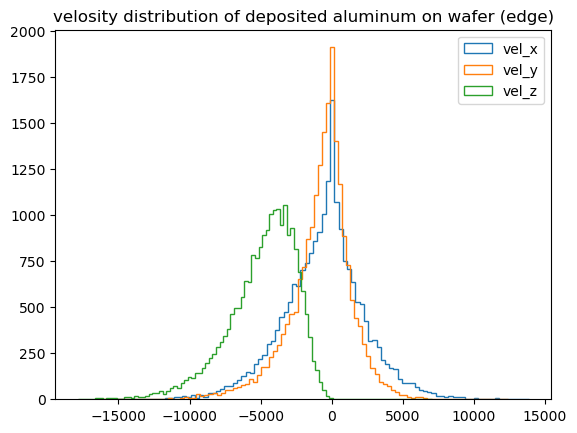

In [76]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()